In [115]:
import numpy as np
import pandas as pd

In [116]:
train = pd.read_csv("Data/Corona_NLP_train.csv",encoding='latin-1')
test = pd.read_csv("Data/Corona_NLP_test.csv",encoding='latin-1')

train.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


Data Cleaning

In [117]:
#drop the duplicate 
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [118]:
#drop userame,screenname,location and tewwt at as they are not important to the analysis
train.drop(['UserName', 'ScreenName','Location','TweetAt'], axis=1, inplace=True)
test.drop(['UserName', 'ScreenName','Location','TweetAt'], axis=1, inplace=True)
train.head(10)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


In [119]:
# check for missing data
train.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [120]:
import string 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# stop word
nltk.download('stopwords')
stop_word = stopwords.words('english')
# keep no and not in the tweet
stop_word.remove('not')
stop_word.remove('no')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/steven/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training set

In [121]:
#change to lower case 
train['OriginalTweet'] = train['OriginalTweet'].str.lower() 
#remove url
train['OriginalTweet'] = train['OriginalTweet'].replace(r'http\S+', '', regex=True)
#remove @ but does not remove the @ name 
train['OriginalTweet'] = train['OriginalTweet'].replace(r'@', '', regex=True)
# remoce punctuation
train['OriginalTweet'] = train['OriginalTweet'].str.replace('[{}]'.format(string.punctuation), '')
# special word
train.replace({'â':'a'}, regex=True, inplace=True)
# stop words remove
train['tweet_without_stopwords'] = train['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))
# tokenize 
#train['tokenized_sents'] = train['tweet_without_stopwords'].apply(word_tokenize)
#train['tokenized'] = train.apply(lambda row: nltk.word_tokenize(row['OriginalTweet']), axis=1)


# show the first 10 rows of the data 
train.head(10)

/var/folders/j_/z90c6z3j2qx9z2c6l9h7wjh00000gn/T/ipykernel_3084/2077411013.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  train['OriginalTweet'] = train['OriginalTweet'].str.replace('[{}]'.format(string.punctuation), '')


,OriginalTweet,Sentiment,tweet_without_stopwords
0,menyrbie philgahan chrisitv and and,Neutral,menyrbie philgahan chrisitv
1,advice talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,coronavirus australia woolworths to give elder...,Positive,coronavirus australia woolworths give elderly ...
3,my food stock is not the only one which is emp...,Positive,food stock not one empty please dont panic eno...
4,me ready to go at supermarket during the covid...,Extremely Negative,ready go supermarket covid19 outbreak not im p...
5,as news of the regionas first confirmed covid...,Positive,news regionas first confirmed covid19 case ca...
6,cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insights covid19...
7,was at the supermarket today didnt buy toilet ...,Neutral,supermarket today didnt buy toilet paper rebel...
8,due to covid19 our retail store and classroom ...,Positive,due covid19 retail store classroom atlanta not...
9,for corona preventionwe should stop to buy thi...,Negative,corona preventionwe stop buy things cash use o...


In [122]:
import re 
def clean(data):
    clean = re.sub(r'http\S+', '', data)
    return clean

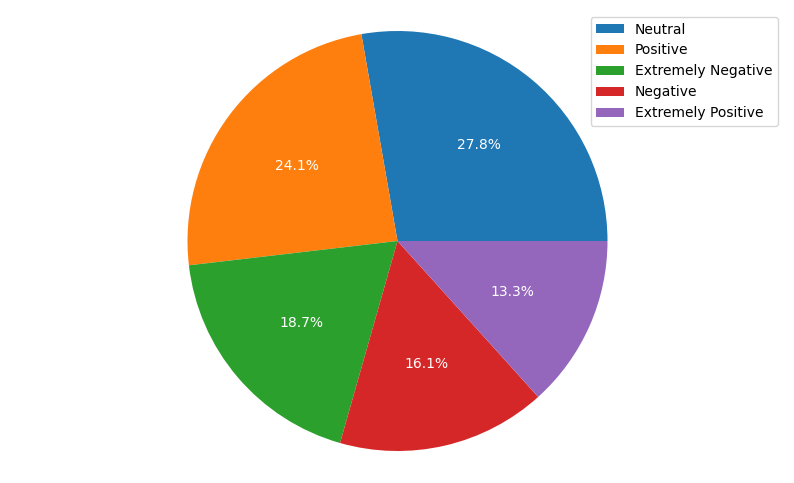

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.pie(train['Sentiment'].value_counts(), labels=train['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [124]:
#replace the sentiment to numerical value
target_mapping={'Extremely Negative':0, 'Negative':1, 'Neutral':2,
                'Positive':3, 'Extremely Positive':4}
train['SentimentMapped']=train['Sentiment'].map(lambda x:target_mapping[x])
test['SentimentMapped']=test['Sentiment'].map(lambda x:target_mapping[x])
train.head(10)

,OriginalTweet,Sentiment,tweet_without_stopwords,SentimentMapped
0,menyrbie philgahan chrisitv and and,Neutral,menyrbie philgahan chrisitv,2
1,advice talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,3
2,coronavirus australia woolworths to give elder...,Positive,coronavirus australia woolworths give elderly ...,3
3,my food stock is not the only one which is emp...,Positive,food stock not one empty please dont panic eno...,3
4,me ready to go at supermarket during the covid...,Extremely Negative,ready go supermarket covid19 outbreak not im p...,0
5,as news of the regionas first confirmed covid...,Positive,news regionas first confirmed covid19 case ca...,3
6,cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insights covid19...,3
7,was at the supermarket today didnt buy toilet ...,Neutral,supermarket today didnt buy toilet paper rebel...,2
8,due to covid19 our retail store and classroom ...,Positive,due covid19 retail store classroom atlanta not...,3
9,for corona preventionwe should stop to buy thi...,Negative,corona preventionwe stop buy things cash use o...,1
